In [30]:
import glob
%matplotlib inline
import pandas as pd

In [31]:
filenames = glob.glob("austen/*.txt")
contents = [open(file).read() for file in filenames]
austen_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': "Jane Austen"
})
austen_df.head()

,author,body,filename
0,Jane Austen,"The Project Gutenberg EBook of Emma, by Jane A...",austen/emma - 1815.txt
1,Jane Austen,"The Project Gutenberg EBook of Mansfield Park,...",austen/mansfield_park - 1814.txt
2,Jane Austen,The Project Gutenberg EBook of Northanger Abbe...,austen/northanger_abbey - 1817.txt
3,Jane Austen,"The Project Gutenberg EBook of Persuasion, by ...",austen/persuasion - 1817.txt
4,Jane Austen,The Project Gutenberg EBook of Pride and Preju...,austen/pride-and-prejudice - 1813.txt


In [32]:
filenames = glob.glob("lovecraft/*.txt")
contents = [open(file).read() for file in filenames]
lovecraft_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': "Howard Phillips Lovecraft"
})
lovecraft_df.head()

,author,body,filename
0,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,"lovecraft/Allowable Rhyme, The - Howard Philli..."
1,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,lovecraft/At the Mountains of Madness - Howard...
2,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,"lovecraft/Beast in the Cave, The - Howard Phil..."
3,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,lovecraft/Beyond the Wall of Sleep - Howard Ph...
4,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,"lovecraft/Book, The - Howard Phillips Lovecraf..."


In [33]:
df = pd.concat([lovecraft_df, austen_df], ignore_index=True)

In [70]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
#if we only read the csv file, words will be in columns and emotions affiliated with them will be in rows
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
# if we do the pivot, it's like group by. words are rows and emotions are columns
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head(3)

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0


In [35]:
emolex_df.emotion.unique()

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'], dtype=object)

In [48]:
fearful_words = emolex_df[emolex_df.fear == 1]['word']
joyful_words = emolex_df[emolex_df.joy == 1]['word']

In [49]:
# emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'joy')].word
# emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'fear')].word

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.001437,0.002874,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000177,0.000089,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.001255,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df['fear'] = wordcount_df[fearful_words].sum(axis=1)
df['joy'] = wordcount_df[joyful_words].sum(axis=1)
df.head(3)

,author,body,filename,fear,joy
0,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,"lovecraft/Allowable Rhyme, The - Howard Philli...",0.068966,0.047414
1,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,lovecraft/At the Mountains of Madness - Howard...,0.084780,0.043852
2,Howard Phillips Lovecraft,Table of Contents\n\n\n\nAbout Lovecraft:\n\n\...,"lovecraft/Beast in the Cave, The - Howard Phil...",0.156838,0.061481


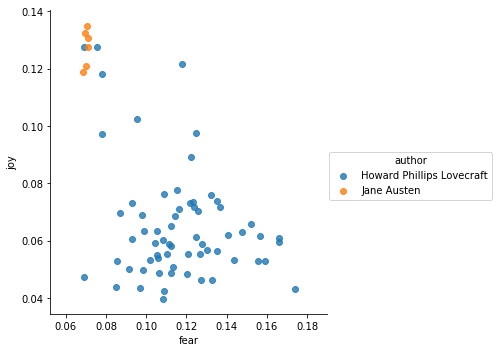

In [74]:
import seaborn as sns
sns.lmplot(x="fear", y="joy", hue="author", data=df, fit_reg=False);
# df.plot(x='fear', y='joy', kind='scatter')